In [1372]:
from geopy.geocoders import Nominatim
from geopy.distance import great_circle
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import mysql.connector
from sqlalchemy import create_engine
import pymysql

In [1373]:
# dataframe:
df = pd.read_csv('C:\\Users\\mojiway\\Desktop\\recom\\recom_table_2.csv',index_col=None)

In [1374]:
df

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481
5,134368,Hoboken,W Hoboken,4-star,40.739162,-74.027744,17,32,7438,232,454
6,55850,San Francisco,Hotel Union Square,3-star,37.785872,-122.407731,13,38,7267,191,444
7,67930,New York,Hotel Pennsylvania,2-star,40.749943,-73.990941,17,38,6742,177,416
8,896,Phuket,Twinpalms Phuket Hotel,5-star,7.977388,98.280226,3,15,6524,435,398
9,64912,Honolulu,Alohilani Resort Waikiki Beach,3-star,21.274273,-157.823954,5,19,6344,334,390


In [1375]:
df['commission'] =  0.15

In [1376]:
df.head()

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648,0.15
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553,0.15
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514,0.15
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497,0.15
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481,0.15


In [1377]:
# input fields:
city_input = 'Tehran'
#lat_input =  13.72069246
#lon_input = 100.51398
#distance_input = 5
#stars_input = '4-star'

(array([140., 271., 266., 193., 120.,  73.,  62.,  53.,  29.,  14.,  26.,
          7.,   5.,   6.,   5.,   3.,   4.,   0.,   4.,   0.,   3.,   3.,
          0.,   0.,   0.,   1.,   2.,   0.,   0.,   2.]),
 array([  18. ,   56.8,   95.6,  134.4,  173.2,  212. ,  250.8,  289.6,
         328.4,  367.2,  406. ,  444.8,  483.6,  522.4,  561.2,  600. ,
         638.8,  677.6,  716.4,  755.2,  794. ,  832.8,  871.6,  910.4,
         949.2,  988. , 1026.8, 1065.6, 1104.4, 1143.2, 1182. ]),
 <a list of 30 Patch objects>)

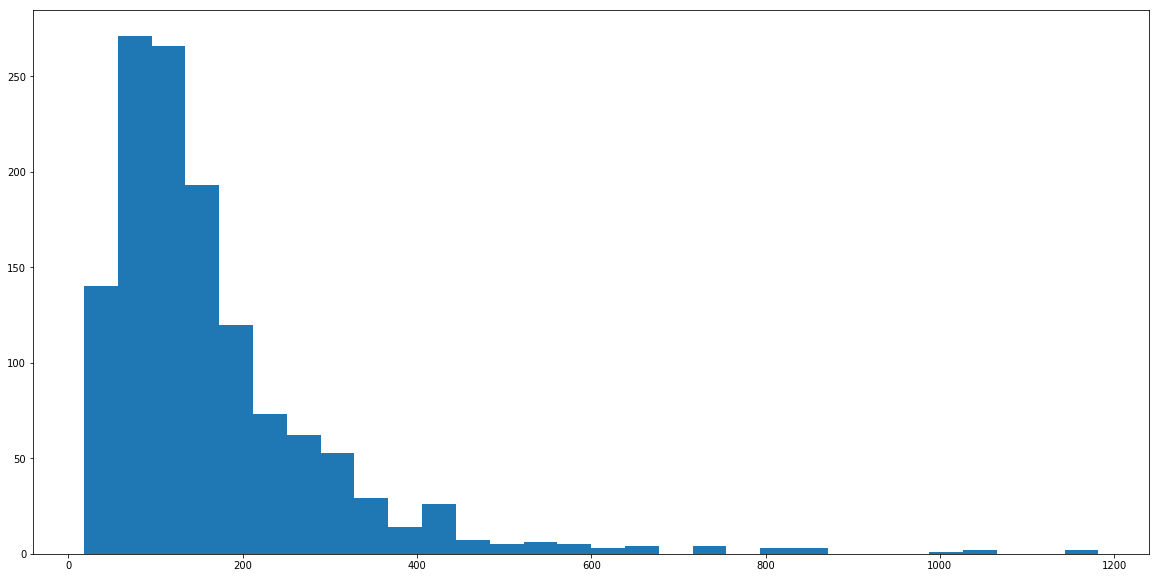

In [1378]:
plt.figure(figsize=(20,10))
plt.hist(df['GBV_per_RNS'], bins=30)

In [1379]:
# data slicing based on the distribution:
def dist(col):
    mean, std = norm.fit(col)
    p0 = mean + 2 * std
    p1 = mean + std
    p2 = mean
    p3 = mean-std if std < mean else mean-0.4*std
    return p0, p1, p2, p3

In [1380]:
gbv_rns_slices = dist(df['GBV_per_RNS'])
df.loc[df['GBV_per_RNS'] > gbv_rns_slices[0], 'gbv_rns_rank'] = 1000
df.loc[(df['GBV_per_RNS'] <gbv_rns_slices[0]) & (df['GBV_per_RNS'] > gbv_rns_slices[1]) , 'gbv_rns_rank'] = 750
df.loc[(df['GBV_per_RNS'] <gbv_rns_slices[1]) & (df['GBV_per_RNS'] > gbv_rns_slices[2]) , 'gbv_rns_rank'] = 500
df.loc[(df['GBV_per_RNS'] <gbv_rns_slices[2]) & (df['GBV_per_RNS'] > gbv_rns_slices[3]) , 'gbv_rns_rank'] = 250
df.loc[df['GBV_per_RNS'] < gbv_rns_slices[3], 'gbv_rns_rank'] = 100

In [1381]:
df['estimated_revenue'] = df['gbv_rns_rank'] * df['commission']

In [1382]:

estimated_revenue_slices = dist(df['estimated_revenue'])
df.loc[df['estimated_revenue'] > estimated_revenue_slices[0], 'revenue_rank'] = 1000
df.loc[(df['estimated_revenue']< estimated_revenue_slices[0]) & (df['estimated_revenue'] > estimated_revenue_slices[1]) , 'revenue_rank'] = 750
df.loc[(df['estimated_revenue']< estimated_revenue_slices[1]) & (df['estimated_revenue'] > estimated_revenue_slices[2]) , 'revenue_rank'] = 500
df.loc[(df['estimated_revenue']< estimated_revenue_slices[2]) & (df['estimated_revenue'] > estimated_revenue_slices[3]) , 'revenue_rank'] = 250
df.loc[df['estimated_revenue'] < estimated_revenue_slices[3], 'revenue_rank'] = 100


In [1383]:
gbv_rns_slices

(436.14003498631484,
 301.48371718355986,
 166.82739938080496,
 32.171081578050035)

In [1384]:
df['city_rank'] = np.where(df['city']== city_input, 1, 0)

In [1385]:
#df['star_rank'] = np.where(df['stars']== stars_input, 1, 0)

In [1386]:
df

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648,0.15,250.0,37.5,250.0,0
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553,0.15,1000.0,150.0,1000.0,0
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514,0.15,500.0,75.0,500.0,0
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497,0.15,500.0,75.0,500.0,0
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481,0.15,1000.0,150.0,1000.0,0
5,134368,Hoboken,W Hoboken,4-star,40.739162,-74.027744,17,32,7438,232,454,0.15,500.0,75.0,500.0,0
6,55850,San Francisco,Hotel Union Square,3-star,37.785872,-122.407731,13,38,7267,191,444,0.15,500.0,75.0,500.0,0
7,67930,New York,Hotel Pennsylvania,2-star,40.749943,-73.990941,17,38,6742,177,416,0.15,500.0,75.0,500.0,0
8,896,Phuket,Twinpalms Phuket Hotel,5-star,7.977388,98.280226,3,15,6524,435,398,0.15,750.0,112.5,750.0,0
9,64912,Honolulu,Alohilani Resort Waikiki Beach,3-star,21.274273,-157.823954,5,19,6344,334,390,0.15,750.0,112.5,750.0,0


In [1387]:

booking_slices = dist(df['bookings'])
df.loc[df['bookings'] > booking_slices[0], 'booking_rank'] = 1000
df.loc[(df['bookings'] < booking_slices[0]) & (df['bookings'] > booking_slices [1]) , 'booking_rank'] = 750
df.loc[(df['bookings'] <booking_slices[1]) & (df['bookings'] > booking_slices [2]) , 'booking_rank'] = 500
df.loc[(df['bookings'] < booking_slices[2]) & (df['bookings'] > booking_slices [3]) , 'booking_rank'] = 250
df.loc[df['bookings'] < booking_slices[3], 'booking_rank'] = 100

In [1388]:
booking_slices

(9.279818707452664, 5.617463533292895, 1.9551083591331269, 0.49016628946921936)

In [1389]:
df

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,booking_rank
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648,0.15,250.0,37.5,250.0,0,1000.0
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553,0.15,1000.0,150.0,1000.0,0,500.0
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514,0.15,500.0,75.0,500.0,0,750.0
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497,0.15,500.0,75.0,500.0,0,1000.0
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481,0.15,1000.0,150.0,1000.0,0,500.0
5,134368,Hoboken,W Hoboken,4-star,40.739162,-74.027744,17,32,7438,232,454,0.15,500.0,75.0,500.0,0,1000.0
6,55850,San Francisco,Hotel Union Square,3-star,37.785872,-122.407731,13,38,7267,191,444,0.15,500.0,75.0,500.0,0,1000.0
7,67930,New York,Hotel Pennsylvania,2-star,40.749943,-73.990941,17,38,6742,177,416,0.15,500.0,75.0,500.0,0,1000.0
8,896,Phuket,Twinpalms Phuket Hotel,5-star,7.977388,98.280226,3,15,6524,435,398,0.15,750.0,112.5,750.0,0,500.0
9,64912,Honolulu,Alohilani Resort Waikiki Beach,3-star,21.274273,-157.823954,5,19,6344,334,390,0.15,750.0,112.5,750.0,0,500.0


In [1390]:
gbv_slices = dist(df['GBV'])
df.loc[df['GBV'] > gbv_slices[0], 'GBV'] = 1000
df.loc[(df['GBV'] < gbv_slices[0]) & (df['GBV'] > gbv_slices[1]) , 'gbv_rank'] = 750
df.loc[(df['GBV'] < gbv_slices[1]) & (df['GBV'] >gbv_slices[2]) , 'gbv_rank'] = 500
df.loc[(df['GBV'] < gbv_slices[2]) & (df['GBV'] > gbv_slices[3]) , 'gbv_rank'] = 250
df.loc[df['GBV'] < gbv_slices[3], 'gbv_rank'] = 100

In [1391]:
gbv_slices

(3176.5639798491725, 1930.6031973549268, 684.6424148606811, 186.2581018629828)

In [1392]:
#def distancer(row):
  #  coords_1 = (row['lat'], row['lon'])
  #  coords_2 = (lat_input, lon_input)
  #  return round(great_circle(coords_1, coords_2).miles, 2)

# df['distance'] = df.apply(distancer, axis=1)


In [1393]:
# df['distance_rnk'] = np.where(df['distance'] > distance_input, 0, 1)

In [1394]:
# df = df[df['distance'] != 0]

In [1395]:
df['rnk'] = (2*df['gbv_rns_rank'] + 2*df['booking_rank'] \
             + 2*df['gbv_rank'] + 5*df['estimated_revenue'])*df['city_rank']
 #* df['star_rank'] * df['distance_rnk']

In [1396]:
df.sort_values(by=['rnk'], ascending=False)

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,booking_rank,gbv_rank,rnk
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,1000,143,1648,0.15,250.0,37.5,250.0,0,1000.0,500.0,0.0
888,56053,Nice,"Boscolo Exedra Nice, Autograph Collection",5-star,43.700052,7.265533,1,1,168,168,10,0.15,500.0,75.0,500.0,0,250.0,100.0,0.0
866,64285,Fort Lauderdale,Pier 66 Hotel Marina,4-star,26.101497,-80.114516,1,1,179,179,11,0.15,500.0,75.0,500.0,0,250.0,100.0,0.0
865,61350,Orlando,Hampton Inn Orlando - S. of Universal Studios,3-star,28.459239,-81.459358,1,1,179,179,11,0.15,500.0,75.0,500.0,0,250.0,100.0,0.0
864,192991,Istanbul,Istanbul Gonen Hotel,5-star,41.010639,28.817169,1,3,179,60,11,0.15,250.0,37.5,250.0,0,250.0,100.0,0.0
863,63333,San Diego,Manchester Grand Hyatt San Diego,4-star,32.710295,-117.168215,1,1,180,180,11,0.15,500.0,75.0,500.0,0,250.0,100.0,0.0
862,64797,Seaside,Shilo Inn Suites Hotel - Seaside Oceanfront,3-star,45.993526,-123.929671,1,1,180,180,11,0.15,500.0,75.0,500.0,0,250.0,100.0,0.0
861,8166,Melbourne,ibis styles Kingsgate Hotel,3-star,-37.816942,144.955740,1,2,182,91,11,0.15,250.0,37.5,250.0,0,250.0,100.0,0.0
860,1304,Jakarta,The Sultan Hotel & Residence,5-star,-6.218387,106.809331,2,2,182,91,11,0.15,250.0,37.5,250.0,0,500.0,100.0,0.0
859,4082,Sydney,Travelodge Sydney,3-star,-33.878210,151.210772,1,1,184,184,11,0.15,500.0,75.0,500.0,0,250.0,100.0,0.0


(array([ 49.,  84., 112.,  91.,  85.,  69.,  56.,  56.,  43.,  39.,  37.,
         30.,  34.,  27.,  12.,  29.,  19.,  12.,  20.,  14.,  17.,  16.,
         13.,  18.,   7.,  14.,   9.,  12.,  12.,   9.,  10.,  48.,   5.,
          7.,   8.,   9.,   7.,   3.,   5.,   8.,   4.,   5.,   2.,   1.,
          4.,   5.,   8.,   9.,   4.,   3.,   1.,   3.,   2.,   2.,   1.,
          2.,   8.,   5.,   1.,   4.,   1.,   2.,   2.,   1.,   5.,   1.,
          2.,   2.,   2.,   1.,   2.,   5.,   0.,   0.,   3.,   4.,   0.,
          2.,   1.,   4.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   0.,
          0.,   3.,   0.,   0.,   3.,   1.,   0.,   2.,   0.,   0.,   1.,
          1.]),
 array([  18.  ,   49.44,   80.88,  112.32,  143.76,  175.2 ,  206.64,
         238.08,  269.52,  300.96,  332.4 ,  363.84,  395.28,  426.72,
         458.16,  489.6 ,  521.04,  552.48,  583.92,  615.36,  646.8 ,
         678.24,  709.68,  741.12,  772.56,  804.  ,  835.44,  866.88,
         898.32,  929.76,  961.2 ,

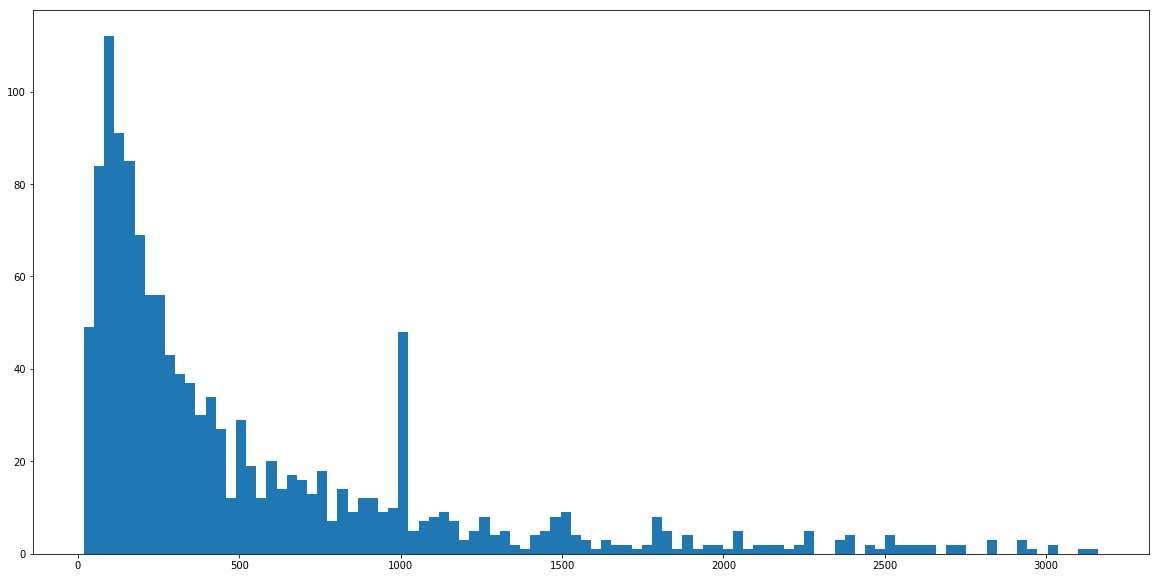

In [1397]:
plt.figure(figsize=(20,10))
plt.hist(df['GBV'], bins=100)

In [1398]:
dist(df['GBV'])

(1741.3944512303797, 1142.6898726740133, 543.9852941176471, 304.50346269510055)

In [1399]:
mean, std = norm.fit(df['GBV'])

In [1400]:
mean, std

(543.9852941176471, 598.7045785563663)

In [1401]:

df = df[df['rnk'] != 0]

#df_final = df.sort_values(['distance', 'rnk'], ascending=[1,0]).reset_index(drop=True)
df_final = df.sort_values('rnk', ascending=False).reset_index(drop=True)

In [1402]:
df_final

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,booking_rank,gbv_rank,rnk


In [1403]:
db = mysql.connector.connect(
      host="127.0.0.1",
      user="root",
      passwd="",
      database="recommenation_simulation",
      buffered=True
)
cursor = db.cursor()

In [1404]:
results = df_final[['Hotel_ID','city','hotel_name','stars','bookings','RNS','GBV','GBV_per_RNS','estimated_revenue','rnk']]

In [1405]:
results

,Hotel_ID,city,hotel_name,stars,bookings,RNS,GBV,GBV_per_RNS,estimated_revenue,rnk


In [1406]:
engine = create_engine("mysql+pymysql://root:@localhost/recommenation_simulation")

In [1407]:
results.head(20).to_sql(name='final_hotels', con=engine, if_exists = 'replace', index=False)